In [1]:
import sage
import matplotlib.pyplot as plt

In [3]:
# number of sides of shape
def mean_solved_time_sagemath(s):
    
    link = -1/3

    A = matrix(QQ, 2*s, 2*s, sparse=True)
    b = matrix(QQ, 2*s, 1)
    for i in range(s):
        A[i, i] = 1
        b[i, 0] = 1
        if i> 0:
            A[i-1, i] = link
            A[i, i-1] = link
    
    for i in range(s, 2*s):
        A[i, i] = 1
        b[i, 0] = 1
        if i > s:
            A[i-1, i] = link
            A[i, i-1] = link
    
    for i in range(s):
        A[i, i+s] = link
        A[i+s, i] = link
    
    A[0, s-1] = link
    A[s-1, 0] = link
    A[s, 2*s-1] = link
    A[2*s-1, s] = link
    
    A = A[1:, 1:]
    b = b[1:]
    
    x = A.augment(b).echelon_form()[:, -1]
    print x[s-1], x[s]
    assert(not any(A*x - b))
    return sum(x)[0] / (s*2)

results = []
for i in range(3, 50):
    mst = mean_solved_time_sagemath(i)
    results.append((i, mst))

(27/5) (33/5)
(7) (9)
(165/19) (219/19)
(52/5) (141/10)
(861/71) (1185/71)
(97/7) (135/7)
(4131/265) (5799/265)
(3620/209) (10233/418)
(18843/989) (26781/989)
(1351/65) (1929/65)
(83109/3691) (119127/3691)
(70588/2911) (203031/5822)
(71577/2755) (103233/2755)
(18817/679) (27207/679)
(1513731/51409) (2193483/51409)
(140452/4505) (407841/9010)
(6313947/191861) (9183129/191861)
(1310435/37829) (1908909/37829)
(26044389/716035) (37992531/716035)
(21518684/564719) (62861895/1129438)
(106456029/2672279) (155675625/2672279)
(3650401/87815) (5343879/87815)
(431847075/9973081) (632810991/9973081)
(354210532/7865521) (1039035033/15731042)
(1740609243/37220045) (2555083797/37220045)
(355904689/7338631) (522849087/7338631)
(6977230437/138907099) (10257485007/138907099)
(379501252/7303505) (1116593241/14607010)
(27835197693/518408351) (40975184013/518408351)
(708158977/12776743) (1043073351/12776743)
(110584460547/1934726305) (162974601363/1934726305)
(89858099588/1525870529) (264996687177/30517410

In [5]:
results

[(3, 47/10),
 (4, 29/4),
 (5, 393/38),
 (6, 279/20),
 (7, 2565/142),
 (8, 635/28),
 (9, 14731/530),
 (10, 27931/836),
 (11, 78183/1978),
 (12, 11997/260),
 (13, 393153/7382),
 (14, 708821/11644),
 (15, 380137/5510),
 (16, 210779/2716),
 (17, 8916627/102818),
 (18, 1736019/18020),
 (19, 40848927/383722),
 (20, 17714641/151316),
 (21, 183572089/1432070),
 (22, 315796645/2258876),
 (23, 811937685/5344558),
 (24, 57794427/351260),
 (25, 3543448347/19946162),
 (26, 6017647739/31462084),
 (27, 15288705623/74440090),
 (28, 6457957451/29354524),
 (29, 65318212017/277814198),
 (30, 7324853499/29214020),
 (31, 276671206173/1036816702),
 (32, 14486926043/51106972),
 (33, 1163075570467/3869452610),
 (34, 1942096660171/6103482116),
 (35, 4856663443983/14440993738),
 (36, 224575128477/632736260),
 (37, 20158865583465/53894522342),
 (38, 33465160953605/85010539324),
 (39, 83225499883301/201137095630),
 (40, 17227060019047/39657956492),
 (41, 341928119081643/750653860178),
 (42, 188311579113033/394681

In [6]:
def my_weird_poly(x):
    q = (x*x + 2*sqrt(3)*x - 1)/4 + (sqrt(3)*x*(2-sqrt(3))^x).expand()
    print (x*x + 2*sqrt(3)*x - 1)/4
    print (sqrt(3)*x*(2-sqrt(3))^x).expand()
    return q

def mypoly(x):
    return (x*x - 1)/4

dens = []
fulls = []
for i in range(3, 100):
    mst = mean_solved_time_sagemath(i)
    mp = mypoly(i)
    fulls.append(mst - mp)
    dens.append((mst - mp).denominator())

# build master list:
#[i for j in range(5) for i in range(j)]
list_of_sets = [set([fac for fac, _ in list(factor(d))]) for d in dens]
mega_set = set([j for set_ in list_of_sets for j in set_])

sorted_keys = list(mega_set)
sorted_keys.sort()
for key in sorted_keys:
    indexes = [e + 3 for e, set_ in enumerate(list_of_sets) if key in set_]
    
    # first, make sure that all entries are multiples of the first one.
    # for each number that is the first of its index:
    # make sure each multiple of that up to 100 is in there.
    if not all([i in indexes for i in range(indexes[0], 100, indexes[0])]):
        print '1. oh no {} does not follow this pattern'.format(key)
    
    if not any([i % indexes[0] == 0 for i in [key+1, key-1]]):
        print '2. oh no {} does not follow this pattern'.format(key)
    
    print key, indexes
        

1. oh no 2 does not follow this pattern
2 [3, 4, 5, 7, 8, 9, 11, 12, 13, 15, 16, 17, 19, 20, 21, 23, 24, 25, 27, 28, 29, 31, 32, 33, 35, 36, 37, 39, 40, 41, 43, 44, 45, 47, 48, 49, 51, 52, 53, 55, 56, 57, 59, 60, 61, 63, 64, 65, 67, 68, 69, 71, 72, 73, 75, 76, 77, 79, 80, 81, 83, 84, 85, 87, 88, 89, 91, 92, 93, 95, 96, 97, 99]
5 [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99]
7 [8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96]
11 [10, 20, 30, 40, 50, 60, 70, 80, 90]
13 [12, 24, 36, 48, 60, 72, 84, 96]
17 [18, 36, 54, 72, 90]
19 [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
23 [11, 22, 33, 44, 55, 66, 77, 88, 99]
29 [15, 30, 45, 60, 75, 90]
31 [32, 64, 96]
37 [36, 72]
41 [14, 28, 42, 56, 70, 84, 98]
43 [11, 22, 33, 44, 55, 66, 77, 88, 99]
47 [23, 46, 69, 92]
53 [9, 18, 27, 36, 45, 54, 63, 72, 81, 90, 99]
59 [58]
61 [60]
67 [34, 68]
71 [7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 

In [14]:
for f in fulls[:80]:
    print '{:>50} | {:<50}'.format(
        factor(f.numerator()), 
        factor(f.denominator())
    )

                                               3^3 | 2 * 5                                             
                                                 7 | 2                                                 
                                        3 * 5 * 11 | 2 * 19                                            
                                            2 * 13 | 5                                                 
                                        3 * 7 * 41 | 2 * 71                                            
                                                97 | 2 * 7                                             
                                          3^5 * 17 | 2 * 5 * 53                                        
                                       2 * 5 * 181 | 11 * 19                                           
                                      3 * 11 * 571 | 2 * 23 * 43                                       
                                           7 * 193 | 2 * 5 * 13 

[27/10, 7/2, 165/38]
13/7


In [43]:
results_minus_one = []
results_minus_one.append(1)
results_minus_one.append(1/2)
results_minus_one.append(2/3)
results_minus_one.append(3/4)

for i in range(100):
    if i <= 4:
        continue
    results_minus_one.append(1 / (1 + 1 / (2 + results_minus_one[i-4])))

[i + 1 for i in results_minus_one]

[2,
 3/2,
 5/3,
 7/4,
 12/7,
 19/11,
 26/15,
 45/26,
 71/41,
 97/56,
 168/97,
 265/153,
 362/209,
 627/362,
 989/571,
 1351/780,
 2340/1351,
 3691/2131,
 5042/2911,
 8733/5042,
 13775/7953,
 18817/10864,
 32592/18817,
 51409/29681,
 70226/40545,
 121635/70226,
 191861/110771,
 262087/151316,
 453948/262087,
 716035/413403,
 978122/564719,
 1694157/978122,
 2672279/1542841,
 3650401/2107560,
 6322680/3650401,
 9973081/5757961,
 13623482/7865521,
 23596563/13623482,
 37220045/21489003,
 50843527/29354524,
 88063572/50843527,
 138907099/80198051,
 189750626/109552575,
 328657725/189750626,
 518408351/299303201,
 708158977/408855776,
 1226567328/708158977,
 1934726305/1117014753,
 2642885282/1525870529,
 4577611587/2642885282,
 7220496869/4168755811,
 9863382151/5694626340,
 17083879020/9863382151,
 26947261171/15558008491,
 36810643322/21252634831,
 63757904493/36810643322,
 100568547815/58063278153,
 137379191137/79315912984,
 237947738952/137379191137,
 375326930089/216695104121,
 51270

/usr/lib/sagemath/local/lib/python2.7/site-packages/traitlets/traitlets.py:770: DeprecationWarning: A parent of InlineBackend._config_changed has adopted the new @observe(change) API
  clsname, change_or_name), DeprecationWarning)


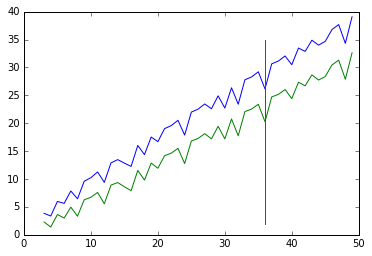

In [4]:
%matplotlib inline
logged = [
    (log(result.numerator()), log(result.denominator())) 
    for _, result in results
]

nums, dens = zip(*logged)
plt.plot(range(3, 50), nums)
plt.plot(range(3, 50), dens)
x = 36
plt.plot([x, x], [2, 35])
plt.show()

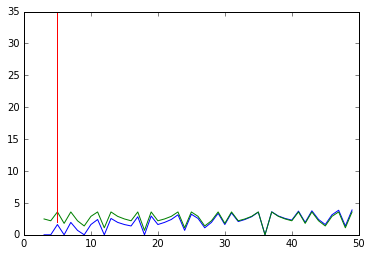

In [5]:
%matplotlib inline
logged = [
    (log((i/36).numerator()), log((i/36).denominator())) 
    for i in range(3, 50)
]

nums, dens = zip(*logged)
plt.plot(range(3, 50), nums)
plt.plot(range(3, 50), dens)
plt.plot([5, 5], [2, 35])
plt.show()

In [6]:
# slope is rise over run
def wtf(i):
    mst = mean_solved_time_sagemath(i)
    return log(mst.numerator())
val = float((wtf(1002) - wtf(6)) / 996)
val

0.6683198652204468

In [17]:
e^val

1.950956695264158

In [24]:
fake_results = []
for i in range(3, 20):
    mst = (5*i^2 + 4*i + 10)/(6*i+7)
    fake_results.append((i, mst))
print fake_results

[(3, 67/25), (4, 106/31), (5, 155/37), (6, 214/43), (7, 283/49), (8, 362/55), (9, 451/61), (10, 550/67), (11, 659/73), (12, 778/79), (13, 907/85), (14, 1046/91), (15, 1195/97), (16, 1354/103), (17, 1523/109), (18, 74/5), (19, 1891/121)]


In [39]:
# fit a rational function to the data
# 1 + Ax + Bx^2 + ... + Zx^n
# ----------------------
# a + bx + cx^2 + ... + Zx^m

n = 5 # up to x^5
m = 4 # up to x^4


# build vandermonde matrix
V = matrix(QQ, len(results), n+m+1)
b = matrix(QQ, len(results), 1)

for e, result in enumerate(results):
    x, y = result
    b[e, 0] = y
    for i in range(m+n+1):
        if i <= n:
            V[e, i] = x^(i)
        else:
            V[e, i] = -y * x^(i-n)
            
echelon = V.augment(b).echelon_form()

print echelon.str()
            
x = echelon[:n+m+1, -1]

if not any(V * x):
    # try the lstsq too.
    x_hat = (V.T * V).I * V.T * b
    print x_hat

[1 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0

In [30]:
# fit a polynomial function to the data
# A + Bx + ... + Zx^n

n = 2 # up to x^2

# build vandermonde matrix
V = matrix(QQ, len(results), n+1)
b = matrix(QQ, len(results), 1)

for e, result in enumerate(results):
    x, y = result
    b[e, 0] = y
    for i in range(n+1):
        V[e, i] = x^(i)
            
echelon = V.augment(b).echelon_form()

print echelon.str()
            
x = echelon[:n+1, -1]

if not any(V * x):
    # try the lstsq too.
    x_hat = (V.T * V).inverse() * V.T * b
    print x_hat

[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[-11858650748339631543257207187262978227543989653050519040384017648913255750950450941288501956132413809229441358453553175013615653941512762802962948566630443042937943786854947307371478455537582486391364717629029514307143/54701166087893290788795511448749908969015824064480516659856358108574757608939015278507853921933237851243404952269491552977670413046640722264634104788535689911019794405027111204262163964790604666935528844504517848072540]
[ 354287603780000456812166613049280754578797912313677435580690211310810416186020189416033

In [13]:
# fit a polynomial function to the data
# A + Bx + ... + Zx^n

terms = 4
seq = [1, 1, 2, 6, 20, 68, 232, 892, 2804]
A = matrix(QQ, len(seq) - terms, terms + 1)

for i in range(len(seq) - terms):
    print i
    for j in range(terms+1):
        A[i, j] = seq[i+j]

print A
A.echelon_form()

0
1
2
3
4
[   1    1    2    6   20]
[   1    2    6   20   68]
[   2    6   20   68  232]
[   6   20   68  232  892]
[  20   68  232  892 2804]


[ 1  0 -2  0  0]
[ 0  1  4  0  0]
[ 0  0  0  1  0]
[ 0  0  0  0  1]
[ 0  0  0  0  0]